                                               Capstone Project 

Title : Data Driven Marketing Optimization : Leveraging insights for Enhanced Campaign Performance & ROI.

About Dataset:

The Marketing Campaign Performance Dataset provides valuable insights into the effectiveness of various
marketing campaigns.

This dataset captures the performance metrics, target audience, duration, channels used, and other essential 
factors that contribute to the success of marketing initiatives. 

With 200000 unique rows of data spanning two years, this dataset offers a comprehensive view of campaign performance across diverse companies and customer segments.

The variables like 'Company','Campaign_Type', 'Duration', 'Channel_Used', 'Location','Language', 'Customer_Segment'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions','Engagement_Score'
are given which will be treated as factors and the ROI variable has been given which is the dependent variable.

In this dataset, the categorical and numerical types of variables are presented.

Problem Statement:The goal is to predict channel effectiveness and identify ROI for all marketing channels in order to optimize marketing strategies and maximize profitability.

Source of the dataset: https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset

Data Definition:

Company: The company responsible for the campaign, representing a mix of fictional brands.

Campaign_Type: The type of campaign employed, including email, social media, influencer, display, or search.

Target_Audience: The specific audience segment targeted by the campaign, such as women aged 25-34, men aged 18-24,
or all age groups.

Duration: The duration of the campaign, expressed in days.

Channels_Used: The channels utilized to promote the campaign, which may include email, social media platforms, 
YouTube, websites, or Google Ads.

Conversion_Rate: The percentage of leads or impressions that converted into desired actions, indicating campaign 
effectiveness.

Acquisition_Cost: The cost incurred by the company to acquire customers, presented in monetary format.
ROI: Return on Investment, representing the profitability and success of the campaign.

Location: The geographical location where the campaign was conducted, encompassing major cities like New York, 
Los Angeles, Chicago, Houston, or Miami.

Language: The language used in the campaign communication, including English, Spanish, French, German, 
#or Mandarin.

Clicks: The number of clicks generated by the campaign, indicating user engagement.

Impressions: The total number of times the campaign was displayed or viewed by the target audience.

Engagement_Score: A score ranging from 1 to 10 that measures the level of engagement generated by the campaign.

Customer_Segment: The specific customer segment or audience category that the campaign was tailored for, 
#such as tech enthusiasts, fashionistas, health and wellness enthusiasts, foodies, or outdoor adventurers.

Date: The date on which the campaign occurred, providing a chronological perspective to analyze trends 
#and patterns.

In [1]:
#Import Libraries
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats
# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

In [3]:
#Read and display data to get insights from the data
df= pd.read_csv('marketing_campaign_dataset (1).csv')
df.drop(columns=['Campaign_ID'], inplace=True)
df.head()

Company Campaign_Type Target_Audience Duration Channel_Used  \
0  Innovate Industries         Email       Men 18-24  30 days   Google Ads   
1       NexGen Systems         Email     Women 35-44  60 days   Google Ads   
2    Alpha Innovations    Influencer       Men 25-34  30 days      YouTube   
3   DataTech Solutions       Display        All Ages  60 days      YouTube   
4       NexGen Systems         Email       Men 25-34  15 days      YouTube   

   Conversion_Rate Acquisition_Cost      ROI     Location  Language  Clicks  \
0         0.040000       $16,174.00 6.290000      Chicago   Spanish     506   
1         0.120000       $11,566.00 5.610000     New York    German     116   
2         0.070000       $10,200.00 7.180000  Los Angeles    French     584   
3         0.110000       $12,724.00 5.550000        Miami  Mandarin     217   
4         0.050000       $16,452.00 6.500000  Los Angeles  Mandarin     379   

   Impressions  Engagement_Score     Customer_Segment        Date  
0         1922                 6    Health & Wellness  2021-01-01  
1         7523                 7         Fashionistas  2021-01-02  
2         7698                 1  Outdoor Adventurers  2021-01-03  
3         1820                 7    Health & Wellness  2021-01-04  
4         4201                 3    Health & Wellness  2021-01-05

Data Analysis and Preparation

Understand the Dataset

Data Dimension

In [4]:
#Check data types
# .shape returns the dimension of the data
df.shape

(200000, 15)

In [5]:
# use .dtypes to view the data type of a variable
df.dtypes

Company              object
Campaign_Type        object
Target_Audience      object
Duration             object
Channel_Used         object
Conversion_Rate     float64
Acquisition_Cost     object
ROI                 float64
Location             object
Language             object
Clicks                int64
Impressions           int64
Engagement_Score      int64
Customer_Segment     object
Date                 object
dtype: object

In [430]:
#We see the dataframe has 15 columns and 200000 observations.

In [431]:
#However, we will change the Company', 'Campaign_Type', 'Duration', 'Channel_Used', 'Location','Language', 
#'Customer_Segment',datatypes to categorical types.

In [432]:
#Change the incorrect data types

In [6]:
# use .astype() to change the data type
# convert object to categorical  
df.Company=df.Company.astype('category')
df.Campaign_Type=df.Campaign_Type.astype('category')
df.Duration =df.Duration.astype('category')
df.Channel_Used=df.Channel_Used .astype('category')
df.Location=df.Location.astype('category')
df.Language =df.Language .astype('category')
df.Customer_Segment =df.Customer_Segment.astype('category')
df.Target_Audience =df.Campaign_Type.astype('category')

In [7]:
# Assuming the column name is 'Monetary_Value'
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '').str.replace(',', '').astype(float)
df.Acquisition_Cost=df.Acquisition_Cost.astype('float64')
df.Date =df.Date.astype('category')
df.drop('Date' , axis = 1 ,inplace = True)

In [8]:
#Recheck the data types after the conversion
df.dtypes

Company             category
Campaign_Type       category
Target_Audience     category
Duration            category
Channel_Used        category
Conversion_Rate      float64
Acquisition_Cost     float64
ROI                  float64
Location            category
Language            category
Clicks                 int64
Impressions            int64
Engagement_Score       int64
Customer_Segment    category
dtype: object

In [436]:
#The data types are now as per the data definition. Now we can proceed with the analysis.

In [437]:
#Summary Statistics

In [438]:
#For numerical variables, we use .describe()

In [9]:
# describe the numerical data
df.describe()

Conversion_Rate  Acquisition_Cost           ROI        Clicks  \
count    200000.000000     200000.000000 200000.000000 200000.000000   
mean          0.080070      12504.393040      5.002438    549.772030   
std           0.040602       4337.664545      1.734488    260.019056   
min           0.010000       5000.000000      2.000000    100.000000   
25%           0.050000       8739.750000      3.500000    325.000000   
50%           0.080000      12496.500000      5.010000    550.000000   
75%           0.120000      16264.000000      6.510000    775.000000   
max           0.150000      20000.000000      8.000000   1000.000000   

        Impressions  Engagement_Score  
count 200000.000000     200000.000000  
mean    5507.301520          5.494710  
std     2596.864286          2.872581  
min     1000.000000          1.000000  
25%     3266.000000          3.000000  
50%     5517.500000          5.000000  
75%     7753.000000          8.000000  
max    10000.000000         10.000000

In [440]:
#The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%),
#minimum, and maximum values, along with the standard deviation.
#The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%)
#minimum, and maximum values, along with the standard deviation.

#Note,  The average conversion rate across channels is approximately 8%. This indicates the proportion of users
#who take a desired action (e.g., making a purchase) after engaging with the marketing channels.

#Acquisition Cost: On average, the cost of acquiring customers is around $12,500. 
#This represents the expenses incurred to attract customers through various marketing channels.

#ROI (Return on Investment): The average ROI stands at about 5, indicating that for every dollar spent on marketing,
#there's a return of $5. It's a measure of the profitability of marketing efforts.

#Clicks and Impressions: These metrics provide insights into the reach and engagement of marketing campaigns. 
#On average, there are approximately 550 clicks and 5500 impressions per campaign.

#Engagement Score: The average engagement score is around 5.5, suggesting the level of interaction 
#and interest generated by marketing activities. Higher engagement scores indicate more effective campaigns.

#To optimize marketing strategies and maximize profitability, businesses should focus on channels with higher 
#conversion rates, lower acquisition costs, and higher ROI.
#Additionally, channels that generate more clicks, impressions, and higher engagement scores 
#should be prioritized for further investment and refinement

In [10]:
#For categorical features, we use .describe(include=object)
# describe the categorical data
# include=category: selects the categorical features
df.describe(include = 'category')

# Note: If we pass 'include=category' to the .describe(),
#       it will return descriptive statistics for categorical variables only

Company Campaign_Type Target_Audience Duration Channel_Used Location  \
count     200000        200000          200000   200000       200000   200000   
unique         5             5               5        4            6        5   
top     TechCorp    Influencer      Influencer  30 days        Email    Miami   
freq       40237         40169           40169    50255        33599    40269   

        Language Customer_Segment  
count     200000           200000  
unique         5                5  
top     Mandarin          Foodies  
freq       40255            40208

The summary statistics for categorical variables can be interpreted as:
   count - Total number of observations
   
   unique - Number of unique classes in a variable
   
   top - The most repeated class
   
   freq - Frequency of most repeated class

From the data, it's evident that TechCorp frequently utilizes influencer campaigns targeting a Mandarin-speaking
audience in Miami, primarily through email channels, with campaigns lasting for 30 days. 

This information suggests potential areas for optimization, such as evaluating the effectiveness of
email campaigns versus other channels, assessing the impact of campaign duration, and considering diversification
in target audience and language preferences to enhance ROI and profitability.

In [11]:
df.groupby('Channel_Used').size()# Is the data in the categorical attribute balanced? 
                              # Is there any bias hidden in the given data?

Channel_Used
Email         33599
Facebook      32819
Google Ads    33438
Instagram     33392
Website       33360
YouTube       33392
dtype: int64

In [443]:
#Missing Values

In [12]:
df.isnull().sum()

Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
dtype: int64

We have seen that there are no missing values but we can check using the related functions.

In [13]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False) 

Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

Total  Percentage of Missing Values
Company               0                      0.000000
Campaign_Type         0                      0.000000
Target_Audience       0                      0.000000
Duration              0                      0.000000
Channel_Used          0                      0.000000
Conversion_Rate       0                      0.000000
Acquisition_Cost      0                      0.000000
ROI                   0                      0.000000
Location              0                      0.000000
Language              0                      0.000000
Clicks                0                      0.000000
Impressions           0                      0.000000
Engagement_Score      0                      0.000000
Customer_Segment      0                      0.000000

Correlation

Correlation is the extent of linear relationship among numeric variables

It indicates the extent to which two variables increase or decrease in parallel
The value of a correlation coefficient ranges between -1 and 1
Correlation among multiple variables can be represented in the form of a matrix. 
This allows us to see which pairs are correlated

In [14]:
#Filter out only the numeric variables from the dataframe using select_dtypes() function
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
df_numeric_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions',
       'Engagement_Score'],
      dtype='object')

In [447]:
# Call the corr() function which will return the correlation matrix of numeric variables

In [15]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

Conversion_Rate  Acquisition_Cost       ROI    Clicks  \
Conversion_Rate          1.000000          0.000718 -0.001143  0.000269   
Acquisition_Cost         0.000718          1.000000  0.004585  0.000141   
ROI                     -0.001143          0.004585  1.000000 -0.002040   
Clicks                   0.000269          0.000141 -0.002040  1.000000   
Impressions             -0.002834          0.000329  0.002257  0.000033   
Engagement_Score        -0.000638         -0.003218  0.000588 -0.001908   

                  Impressions  Engagement_Score  
Conversion_Rate     -0.002834         -0.000638  
Acquisition_Cost     0.000329         -0.003218  
ROI                  0.002257          0.000588  
Clicks               0.000033         -0.001908  
Impressions          1.000000          0.003030  
Engagement_Score     0.003030          1.000000

In [449]:
#Pass the correlation matrix to the heatmap() function of the seaborn library
#to plot the heatmap of the correlation matrix

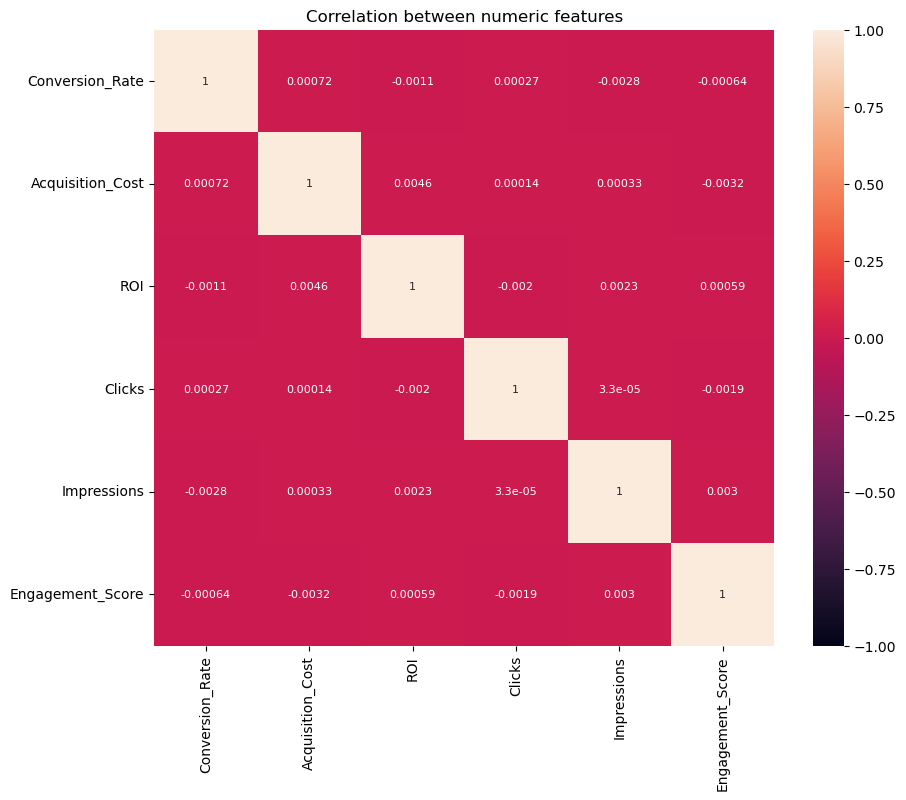

In [16]:
# set the figure size
plt.figure(figsize=(10, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True , annot_kws={"size": 8})

# cmap='YlGnBu'

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

It can be observed that the numeric variables are less correlated with each other since
all the correlation coefficients are close to zero or 0.1.
It implies that there will be less multicollinearity in the data.
Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present 
in the data.
Correlation does not imply causation. In other words, if two variables are correlated it does not mean that 
one variable caused the other

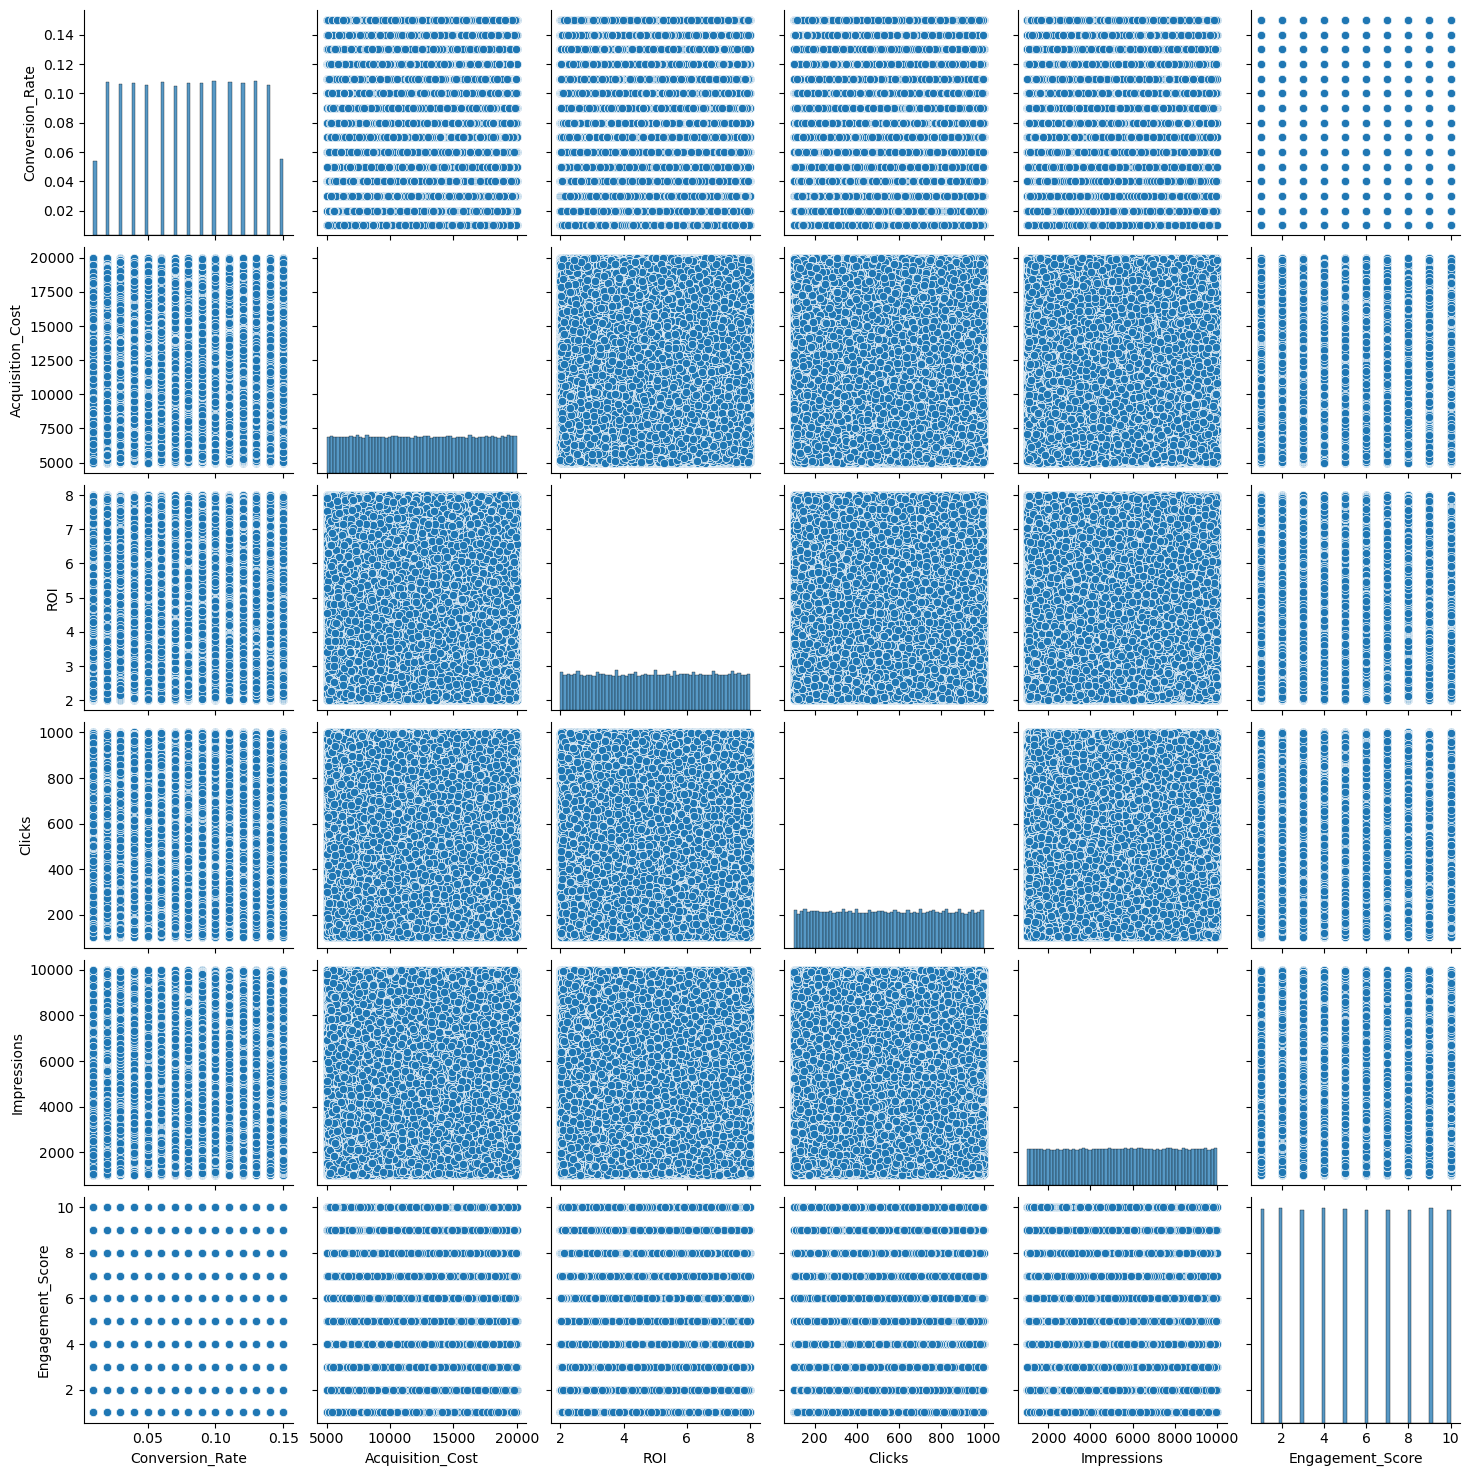

In [17]:
sns.pairplot(df, )

Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. 
The values, distribution, and dispersion of categorical variables are best understood with bar plots.

In [18]:
#The summary statistics of the categorical features.
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df.describe(include='category')

Company Campaign_Type Target_Audience Duration Channel_Used Location  \
count     200000        200000          200000   200000       200000   200000   
unique         5             5               5        4            6        5   
top     TechCorp    Influencer      Influencer  30 days        Email    Miami   
freq       40237         40169           40169    50255        33599    40269   

        Language Customer_Segment  
count     200000           200000  
unique         5                5  
top     Mandarin          Foodies  
freq       40255            40208

There are 8 categorical variables. From the output we see that all variables has eqaul number of categories. 
There are 6 Channel used in the data. Let us visualize the variables

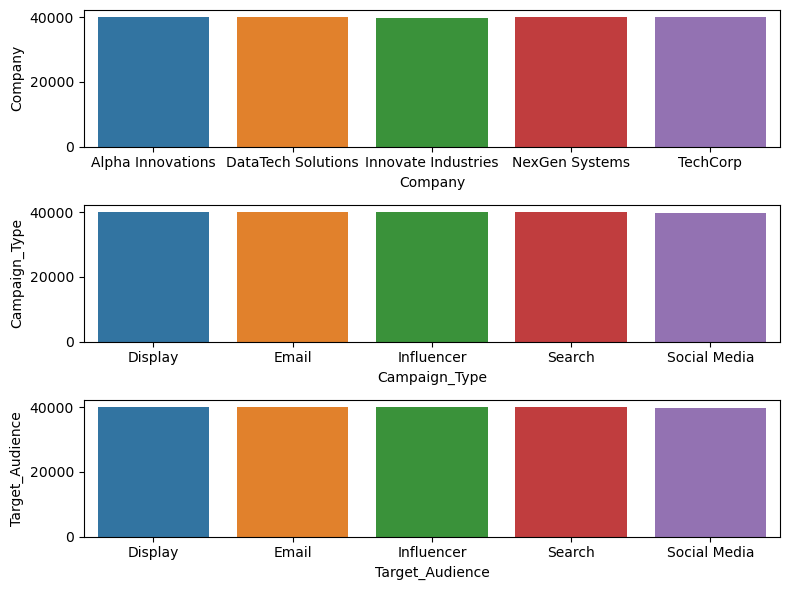

In [19]:
# create a list of all categorical variables
# include=category: selects the categoric features
df_categoric_features = df.select_dtypes(include='category')

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 1, figsize=(8,6))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(x=df[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 10)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

From the above plot we see that:
The number of categories in all variables are nearly equal

Analyze Relationship Between Target and Categorical Variables

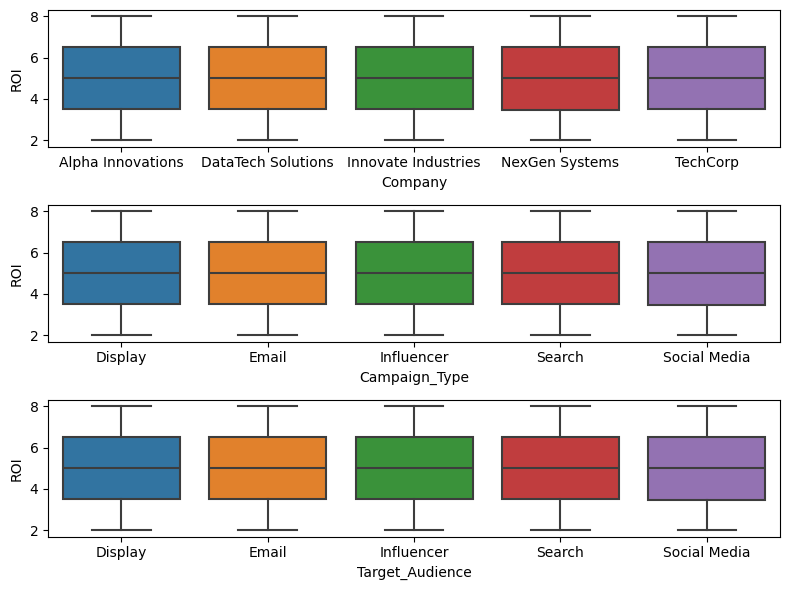

In [454]:
# plot the boxplot for each categorical variable 
# create subplots using subplots()
# 6 subplots in 3 rows and 1 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 1, figsize=(8, 6))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='ROI', data=df, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 10)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

As we can see the means of the different categories across the different gender are nearly the same.
We can see that the median of of the different categories across the different categories are nearly the same.

Discover Outliers

Importance of detecting an outlier

An outlier is an observation that appears to deviate distinctly from other observations in the data. 
If the outliers are not removed, the model accuracy may decrease.


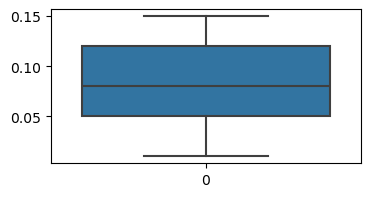

********************************************


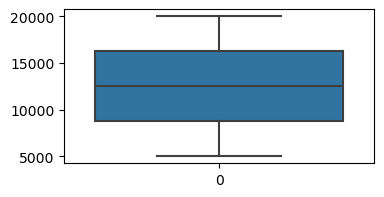

********************************************


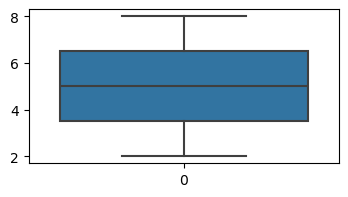

********************************************


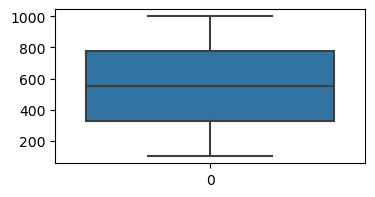

********************************************


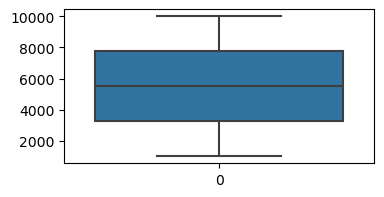

********************************************


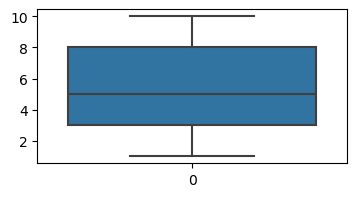

********************************************


In [455]:
#Plot boxplot for numerical data
for var in df_numeric_features.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(df[var])
    plt.show()
    
    print('***********'*4)


From the above plot, we notice that for that there are no outliers.

Prepare the Data

Check for Normality
As per the assumptions of linear regression, residuals (actual values - predicted values) 
should be normally distributed. 
If the target variable is normally distributed then the residuals are also normally distributed, 
thus we check the normality only for target variable.
In order to check for normality of our target variable,
Plot a histogram and also perform the Jarque-Bera test
If the data is not normally distributed, use log transformation to get near normally distributed data
Recheck for normality by plotting histogram and performing Jarque-Bera test

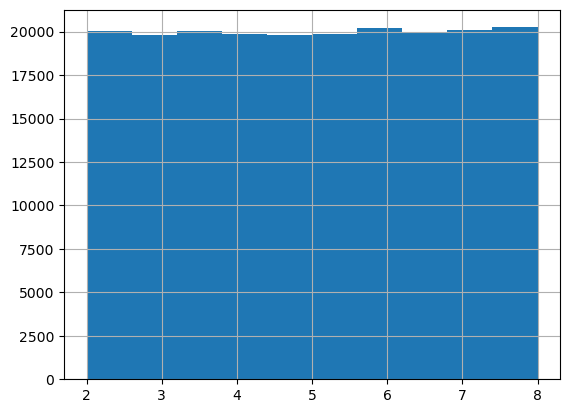

In [456]:
# check the distribution of target variable using hist()
df.ROI.hist()

# display the plot
plt.show()

From the above plot, we can notice that the variable 'ROI' is uniform.
and not normally distributed
We should not only make conclusions through visual representations or only using a statistical test
but perform multiple ways to get the best insights
Let us perform Shapiro and Jarque-Bera test to check the normality of the target variable.
The null and alternate hypothesis of Jarque-Bera test are as follows:

H0: The data is normally distributed
H1: The data is not normally distributed

In [457]:
from scipy import stats
stat, p = stats.shapiro(df["ROI"])
print("Statistics=%.3f, p-value=%.3f" % (stat, p))

alpha = 0.05 # Tail region ie 95% confidence level
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.955, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis.
It can be concluded that the data is not normally distributed.
Now we opt for log transformation in order to reduce the skewness. We will log transform the ROI variable.
Usually for testing the normality of data, the Shaprio Wilk Test is used. 
However, it does not work if the number of observations are more than 5000 inspite it being more robust than other tests. In case where the observations are more than 5000, other tests like Anderson Darling test or Jarque Bera test may also be used. So we have used shapiro test
If the data is not normally distributed 
We apply log transformation techniques to get near normally distributed data to improve fit of linear regression
model and reduce skewness

If the data is not normally distributed,
use log transformation to get near normally distributed data

As mentioned above we opt for log transformation. The log transformation can be used to make highly skewed distributions less skewed. We use np.log() to log transform the 'ROI' variable. 
We also store the transformed variable into our data frame with a new name, 'log_ROI'.

In [458]:
# log transformation for normality using np.log()
df['log_ROI'] = np.log(df['ROI'])

# display first 5 rows of the data
df.head()

Company Campaign_Type Target_Audience Duration Channel_Used  \
0  Innovate Industries         Email           Email  30 days   Google Ads   
1       NexGen Systems         Email           Email  60 days   Google Ads   
2    Alpha Innovations    Influencer      Influencer  30 days      YouTube   
3   DataTech Solutions       Display         Display  60 days      YouTube   
4       NexGen Systems         Email           Email  15 days      YouTube   

   Conversion_Rate  Acquisition_Cost      ROI     Location  Language  Clicks  \
0         0.040000      16174.000000 6.290000      Chicago   Spanish     506   
1         0.120000      11566.000000 5.610000     New York    German     116   
2         0.070000      10200.000000 7.180000  Los Angeles    French     584   
3         0.110000      12724.000000 5.550000        Miami  Mandarin     217   
4         0.050000      16452.000000 6.500000  Los Angeles  Mandarin     379   

   Impressions  Engagement_Score     Customer_Segment  log_ROI  
0         1922                 6    Health & Wellness 1.838961  
1         7523                 7         Fashionistas 1.724551  
2         7698                 1  Outdoor Adventurers 1.971299  
3         1820                 7    Health & Wellness 1.713798  
4         4201                 3    Health & Wellness 1.871802

In [459]:
#Recheck for normality by plotting histogram and performing Jarque-Bera test
#Let us first plot a histogram of log_ROI

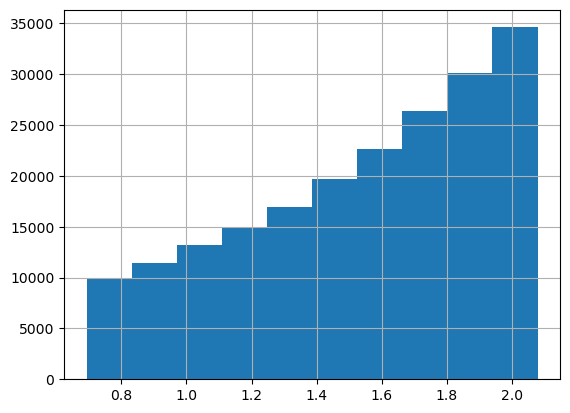

In [460]:
# recheck for normality 
# plot the histogram using hist
df.log_ROI.hist()

# display the plot
plt.show()

It can be seen that the variable ROI is near normally distributed. However we again confirm by Jarque Bera test
Let us perform Jarque Bera test

In [461]:
# recheck normality by Jarque-Bera test
# the test returns the the test statistics and the p-value of the test
statn, pv = jarque_bera(df['log_ROI'])

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.955, p-value=0.000
The data is not normally distributed (reject H0)


It can be visually seen that the data has no normal distribution, but Jarque Bera test does not support the 
claim

One-Way Anova

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. 
For example, we apply ANOVA to see whether the mean of ROI is significantly different across channels used
The null and alternate hypothesis of one-way anova are as follows:
H0 (Null Hypothesis): There is no significant difference in ROI between Facebook and Instagram channels.
H1 (Alternative Hypothesis): There is a significant difference in ROI between Facebook and Instagram channels.

In [462]:
#One Way Anova for 'Channel_Used' on 'Charges'
# perform one way anova for Channel _used as Fcebook on ROI using f_oneway()
f_oneway(df['ROI'][df['Channel_Used'] == 'Facebook'], 
             df['ROI'][df['Channel_Used'] == 'Instagram'])

F_onewayResult(statistic=4.924919385934398, pvalue=0.02647541331984327)

In [463]:
#The one-way ANOVA test comparing ROI between Facebook and Instagram channels yields a statistically
#significant result (F(1, N=sample size) = 4.92, p < 0.05), 
#indicating that there is a significant difference in ROI among these two channels.

In [464]:
#Dummy Encoding of Categorical Variable
#To build linear regression models we use OLS method. 
               # 1. Filter numerical and categorical variables
                
               # 2. Dummy encode the catergorical variables
                
               # 3. Concatenate numerical and dummy encoded categorical variables

In [465]:
#Filter numerical and categorical variables
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions',
       'Engagement_Score', 'log_ROI'],
      dtype='object')

In [466]:
# filter the categorical features in the dataset using select_dtypes()
# include=category: selects the categoric features
df_categoric_features = df.select_dtypes(include='category')

# display categorical features
df_categoric_features.columns

Index(['Company', 'Campaign_Type', 'Target_Audience', 'Duration',
       'Channel_Used', 'Location', 'Language', 'Customer_Segment'],
      dtype='object')

In [467]:
#Dummy encode the catergorical variables

In [468]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

In [469]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions',
       'Engagement_Score', 'log_ROI'],
      dtype='object')

In [470]:
# Assuming df is your DataFrame containing the specified columns

# Add the specified columns to the DataFrame
df['Company'] = df['Company'].astype('object')
df['Campaign_Type'] = df['Campaign_Type'].astype('object')
df['Channel_Used'] = df['Channel_Used'].astype('object')
df['Location'] = df['Location'].astype('object')
df['Language'] = df['Language'].astype('object')
df['Customer_Segment'] = df['Customer_Segment'].astype('object')

# Filter the categorical features in the dataset using select_dtypes()
# include='object': selects the categorical features
df_categoric_features = df.select_dtypes(include='object')

# Display categorical features
df_categoric_features.columns


Index(['Company', 'Campaign_Type', 'Channel_Used', 'Location', 'Language',
       'Customer_Segment'],
      dtype='object')

Thus we have obtained the dummy coded variables.
Note: Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, 
where n is the number of classes in each categorical variable. 
So for variable 'Channel_Used', which has 7 levels, it has created 6 dummy encoded variables.
Similarly, variable 'Campaign_type' has 5 levels and it has created 4 dummy encoded variable.
There are various forms of encoding like n-1 dummy encoding, one hot encoding, label encoding, frequency encoding
Let us now proceed to train models. 
One model with the original charges variable and another model with the log transformed charges variable. 
We shall begin by fitting a linear regression model using the method of ordinary least square(OLS)

In [471]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

In [472]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)
# Convert boolean values to integers (0 for False, 1 for True) for all boolean columns
df_dummy = df_dummy.astype(int)
# display data with dummy variables
df_dummy.head()

Conversion_Rate  Acquisition_Cost  ROI  Clicks  Impressions  \
0                0             16174    6     506         1922   
1                0             11566    5     116         7523   
2                0             10200    7     584         7698   
3                0             12724    5     217         1820   
4                0             16452    6     379         4201   

   Engagement_Score  log_ROI  Company_DataTech Solutions  \
0                 6        1                           0   
1                 7        1                           0   
2                 1        1                           0   
3                 7        1                           1   
4                 3        1                           0   

   Company_Innovate Industries  Company_NexGen Systems  Company_TechCorp  \
0                            1                       0                 0   
1                            0                       1                 0   
2                            0                       0                 0   
3                            0                       0                 0   
4                            0                       1                 0   

   Campaign_Type_Email  Campaign_Type_Influencer  Campaign_Type_Search  \
0                    1                         0                     0   
1                    1                         0                     0   
2                    0                         1                     0   
3                    0                         0                     0   
4                    1                         0                     0   

   Campaign_Type_Social Media  Channel_Used_Facebook  Channel_Used_Google Ads  \
0                           0                      0                        1   
1                           0                      0                        1   
2                           0                      0                        0   
3                           0                      0                        0   
4                           0                      0                        0   

   Channel_Used_Instagram  Channel_Used_Website  Channel_Used_YouTube  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     1   
3                       0                     0                     1   
4                       0                     0                     1   

   Location_Houston  Location_Los Angeles  Location_Miami  Location_New York  \
0                 0                     0               0                  0   
1                 0                     0               0                  1   
2                 0                     1               0                  0   
3                 0                     0               1                  0   
4                 0                     1               0                  0   

   Language_French  Language_German  Language_Mandarin  Language_Spanish  \
0                0                0                  0                 1   
1                0                1                  0                 0   
2                1                0                  0                 0   
3                0                0                  1                 0   
4                0                0                  1                 0   

   Customer_Segment_Foodies  Customer_Segment_Health & Wellness  \
0                         0                                   1   
1                         0                                   0   
2                         0                                   0   
3                         0                                   1   
4                         0                                   1   

   Customer_Segment_Outdoor Adventurers  Customer_Segment_Tech Enthusiasts  

Linear Regression (OLS)

Simple Linear Regression (OLS)
In this section, we build a simple Linear model with linear regression using OLS (Ordinary Least Square). By simple linear model, we indicate that we consider only one independent variable that is present in the dataset.
In order to build the model, we do the following:
                   1. Take one independent variable.
                   2. Build model using sm.OLS().fit()
                   3. Understand the model summary

In [473]:
#Choose one independent variable to build the model
X = sm.add_constant(df_dummy.Channel_Used_Facebook)
y = df_dummy.ROI

In [474]:
X.head()

const  Channel_Used_Facebook
0 1.000000                      0
1 1.000000                      0
2 1.000000                      0
3 1.000000                      0
4 1.000000                      0

In [475]:
#Build model using sm.OLS().fit()
SLR = sm.OLS(y, X).fit()
# print the summary output
print(SLR.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.987
Date:                Sun, 26 May 2024   Prob (F-statistic):             0.0840
Time:                        17:10:37   Log-Likelihood:            -3.9123e+05
No. Observations:              200000   AIC:                         7.825e+05
Df Residuals:                  199998   BIC:                         7.825e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     4.50

In [476]:
#This model explains 0% of the variation in the dependent variable ROI. 
#The Durbin-Watson test statistics is 1.98 and indicates that there is no autocorrelation. 
#The p-value of the JB test is nearly 0 and indicates that residuals are not normally distributed.
#Let's use the log ROI feature and check how the model performs. 
#Now we will see Multi Linear Regression using multiple numerical and categorical independent variables.

In [477]:
# Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

#In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique.
#By full model we indicate that we consider all the independent variables that are present in the dataset.
#In order to build the model, we do the following:
                   #1. Seperate the independent variables and dependent variable
                   
                   #2. Build model using sm.OLS().fit()
                   
                   #3. Understand the model summary

In [478]:
# add the intercept column to the dataset
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['ROI','log_ROI'], axis=1)

# extract the target variable from the data set
y = df_dummy[['log_ROI','ROI']]

In [479]:
#Split the data into training and test sets

In [480]:
# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [481]:
#Build model using sm.OLS().fit()

In [482]:
# build a full model using OLS()
# consider the log of charges 
linreg_full_model_withlog = sm.OLS(y_train["log_ROI"], X_train).fit()

# print the summary output
print(linreg_full_model_withlog.summary())

                            OLS Regression Results                            
Dep. Variable:                log_ROI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.002
Date:                Sun, 26 May 2024   Prob (F-statistic):              0.462
Time:                        17:10:38   Log-Likelihood:            -1.0034e+05
No. Observations:              150000   AIC:                         2.007e+05
Df Residuals:                  149970   BIC:                         2.010e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [483]:
print(df_dummy.dtypes)

const                                   float64
Conversion_Rate                           int64
Acquisition_Cost                          int64
ROI                                       int64
Clicks                                    int64
Impressions                               int64
Engagement_Score                          int64
log_ROI                                   int64
Company_DataTech Solutions                int64
Company_Innovate Industries               int64
Company_NexGen Systems                    int64
Company_TechCorp                          int64
Campaign_Type_Email                       int64
Campaign_Type_Influencer                  int64
Campaign_Type_Search                      int64
Campaign_Type_Social Media                int64
Channel_Used_Facebook                     int64
Channel_Used_Google Ads                   int64
Channel_Used_Instagram                    int64
Channel_Used_Website                      int64
Channel_Used_YouTube                    

In [484]:
#This model explains 0% of the variation in the dependent variable charges. 
#we can also see that Adjusted R2 is close to R2 which tells us that variables might not insignificant.

#The Durbin-Watson test statistics is 2.003 and indicates that there is no autocorrelation. 
#It suggests that there is no much multicollinearity.
#But the Jarque bera test says that errors are not normally distributed.

In [485]:
#Model Evaluation

In [486]:
#Let's create a data frame that can store the model performance measures.

In [487]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

Empty DataFrame
Columns: [Model_Name, R-Squared, Adj. R-Squared, RMSE]
Index: []

In [488]:
#Split the data into training and test sets to measure the model performance

In [489]:
# add the intercept column to the dataset
df_dummy = sm.add_constant(df_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_dummy.drop(['ROI','log_ROI'], axis=1)

# extract the target variable from the data set
y = df_dummy[['log_ROI','ROI']]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (150000, 31)
The shape of X_test is: (50000, 31)
The shape of y_train is: (150000, 2)
The shape of y_test is: (50000, 2)


Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique.
By full model we indicate that we consider all the independent variables that are present in the dataset.
In this case, we do not consider any kind of transformation on the dependent variable, 
We use the 'ROI' variable as it is.
We do not need to do the train and test split again since it has been done while building the previous model
                   In order to build the model, we do the following:
                   1. Build model using sm.OLS().fit()
                   2. Predict the values using test set
                   3. Compute the accuracy measures 
                   4. Tabulate the results

In [490]:
#Build model using sm.OLS().fit()
# ordinary least squares regression
# we use the data sets from the previous model
# however, now we shall build a model using the variable 'charges' 

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['ROI'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.025
Date:                Sun, 26 May 2024   Prob (F-statistic):              0.428
Time:                        17:10:39   Log-Likelihood:            -2.9342e+05
No. Observations:              150000   AIC:                         5.869e+05
Df Residuals:                  149970   BIC:                         5.872e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In summary:

1.The R-squared and Adjusted R-squared values being 0 indicate that the model does not explain any variation
in the dependent variable (ROI). This suggests that the independent variable(s) included in the model do not have
#a significant linear relationship with the dependent variable.

2.A p-value of 1.025 for the F-statistic suggests that the overall significance of the regression model 
#is not supported, as a p-value greater than 0.05 is typically considered insignificant.

3.The Durbin-Watson statistic being close to 2 (2.003) indicates that there is no significant autocorrelation
#present in the residuals of the model.

4.The Omnibus test and Jarque-Bera (JB) test are measures of normality of residuals.
#A low p-value for the Omnibus test (0.000) and a high JB statistic (10024.191) with a corresponding p-value of 0.00 suggest that the residuals are not normally distributed.

5.The skewness close to 0 (-0.001) indicates that the residuals are approximately symmetrically distributed, 
#while the kurtosis (1.734) suggests that the distribution is slightly peaked compared to a normal distribution.

6.The large condition number (Cond. No. 2.25e+15) indicates multicollinearity may be present in the model,
#which can lead to unstable estimates of coefficients and affect the interpretation of the model.

In essence, the regression model appears to be inadequate in explaining the variation in the dependent variable,
and the assumptions of linear regression may not be fully met. 

Calculate the p-values to know the insignificant variables

In [491]:
# calculate the p-values for all the variables
# create a dataframe using pd.DataFrame()
# columns: specifies the column names
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

P-Value
const                                0.000000
Conversion_Rate                      0.000000
Acquisition_Cost                     0.016013
Clicks                               0.517799
Impressions                          0.443385
Engagement_Score                     0.726674
Company_DataTech Solutions           0.819411
Company_Innovate Industries          0.628434
Company_NexGen Systems               0.520131
Company_TechCorp                     0.523500
Campaign_Type_Email                  0.365361
Campaign_Type_Influencer             0.434574
Campaign_Type_Search                 0.750855
Campaign_Type_Social Media           0.289564
Channel_Used_Facebook                0.070502
Channel_Used_Google Ads              0.996026
Channel_Used_Instagram               0.610071
Channel_Used_Website                 0.201667
Channel_Used_YouTube                 0.892662
Location_Houston                     0.897907
Location_Los Angeles                 0.845323
Location_Miami                       0.928652
Location_New York                    0.207803
Language_French                      0.163298
Language_German                      0.154728
Language_Mandarin                    0.300554
Language_Spanish                     0.369493
Customer_Segment_Foodies             0.679918
Customer_Segment_Health & Wellness   0.531716
Customer_Segment_Outdoor Adventurers 0.508211
Customer_Segment_Tech Enthusiasts    0.870789

In [492]:
#The above table shows the p-values for all the variables to decide the significant variables
#Let's create a list of insignificant variables

In [493]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['Clicks',
 'Impressions',
 'Engagement_Score',
 'Company_DataTech Solutions',
 'Company_Innovate Industries',
 'Company_NexGen Systems',
 'Company_TechCorp',
 'Campaign_Type_Email',
 'Campaign_Type_Influencer',
 'Campaign_Type_Search',
 'Campaign_Type_Social Media',
 'Channel_Used_Facebook',
 'Channel_Used_Google Ads',
 'Channel_Used_Instagram',
 'Channel_Used_Website',
 'Channel_Used_YouTube',
 'Location_Houston',
 'Location_Los Angeles',
 'Location_Miami',
 'Location_New York',
 'Language_French',
 'Language_German',
 'Language_Mandarin',
 'Language_Spanish',
 'Customer_Segment_Foodies',
 'Customer_Segment_Health & Wellness',
 'Customer_Segment_Outdoor Adventurers',
 'Customer_Segment_Tech Enthusiasts']

In [494]:
# select significant variables
significant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  < 0.05]

# get the position of a specified value
signi_var = significant_variables.index

# convert the list of variables to 'list' type
signi_var = signi_var.to_list()

# get the list of insignificant variables
signi_var

['const', 'Conversion_Rate', 'Acquisition_Cost']

In [495]:
#These are the insignificant variables because their p-value is greater than 0.05.
#Notice, the variable 'Conversion_Rate', 'Acquisition_Cost are significant variables.

In [496]:
#Predict the values using test set

In [497]:
# predict the charges using predict()
predicted_ROI = linreg_full_model_withoutlog.predict(X_test)

# extract the 'charges' values from the test data
actual_ROI = y_test['ROI']

In [498]:
#Compute model accuracy measures

In [499]:
#Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_ROI, predicted_ROI)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

In [500]:
#Tabulate the results
# compile the required information
# Define an empty DataFrame to store the results
score_card = pd.DataFrame(columns=['Model_Name', 'RMSE', 'R-Squared', 'Adj. R-Squared'])

# Compile the required information for the linear regression model without log-transformed target variable
linreg_full_model_withoutlog_metrics = pd.DataFrame({
    'Model_Name': ["Linreg without log"],
    'RMSE': [linreg_full_model_withoutlog_rmse],
    'R-Squared': [linreg_full_model_withoutlog_rsquared],
    'Adj. R-Squared': [linreg_full_model_withoutlog_rsquared_adj]
})

# Concatenate the new row to the score card DataFrame
score_card = pd.concat([score_card, linreg_full_model_withoutlog_metrics], ignore_index=True)

# Print the result table
print(score_card)


           Model_Name     RMSE  R-Squared  Adj. R-Squared
0  Linreg without log 1.710776   0.000198        0.000005


In [501]:
#The R-squared and Adjusted R-squared close to zero, the model explains very little of the variance in 
#the dependent variable, suggesting that the model may not be effectively 
#capturing the relationship between the independent and dependent variables. 
#Additionally, the RMSE value indicates the average magnitude of the residuals, 
#with lower values indicating better model fit. In this case, the RMSE value is 1.710776.

Check the Assumptions of the Linear Regression

Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. 

One of the assumptions of the linear regression is that there should not be autocorrelation.
The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should 
be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows:
      H0: There is no autocorrelation in the residuals
      H1: There is autocorrelation in the residuals
The test stats value is nearly equal to 2(1-r), Here r is the sample autocorrelation of the residuals. If r == 0, then we can say that no serial correlation and the test statistic equals 2. This statistic always is between 0 and  If the test statistic is near to or closer to 0 then there will be more evidence to say that positive serial correlation. and if the test stats value is near to or closer to 4, then we can say that more evidence for negative serial correlation*

From the summary output in section 5.3.1, we see that the Durbin-Watson static is 1.980
Hence we can conclude that there is no autocorrelation

In [502]:
#Detecting Heteroskedasticity
#Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.
#Breusch-Pagan is the test for detecting heteroskedasticity:
#The null and alternate hypothesis of Breusch-Pagan test is as follows:
#H0: The residuals are homoskedastic
#H1: The residuals are not homoskedastic

In [503]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_full_model_withoutlog.resid, linreg_full_model_withoutlog.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)           

[('f-value', 29.980602979207127), ('p-value', 0.4666475045355455)]

In [504]:
#The F-value is 29.9806, which indicates the overall significance of the regression model. 
#However, the associated p-value is 0.4666, which is greater than the conventional significance level of 0.05.
#This suggests that there is insufficient evidence to reject the null hypothesis, meaning that 
#the regression model may not be statistically significant in explaining the variation in the dependent variable.

In [505]:
#Linearity of Residuals
#Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.

#The independent variables must have a linear relationship with the dependent variable.

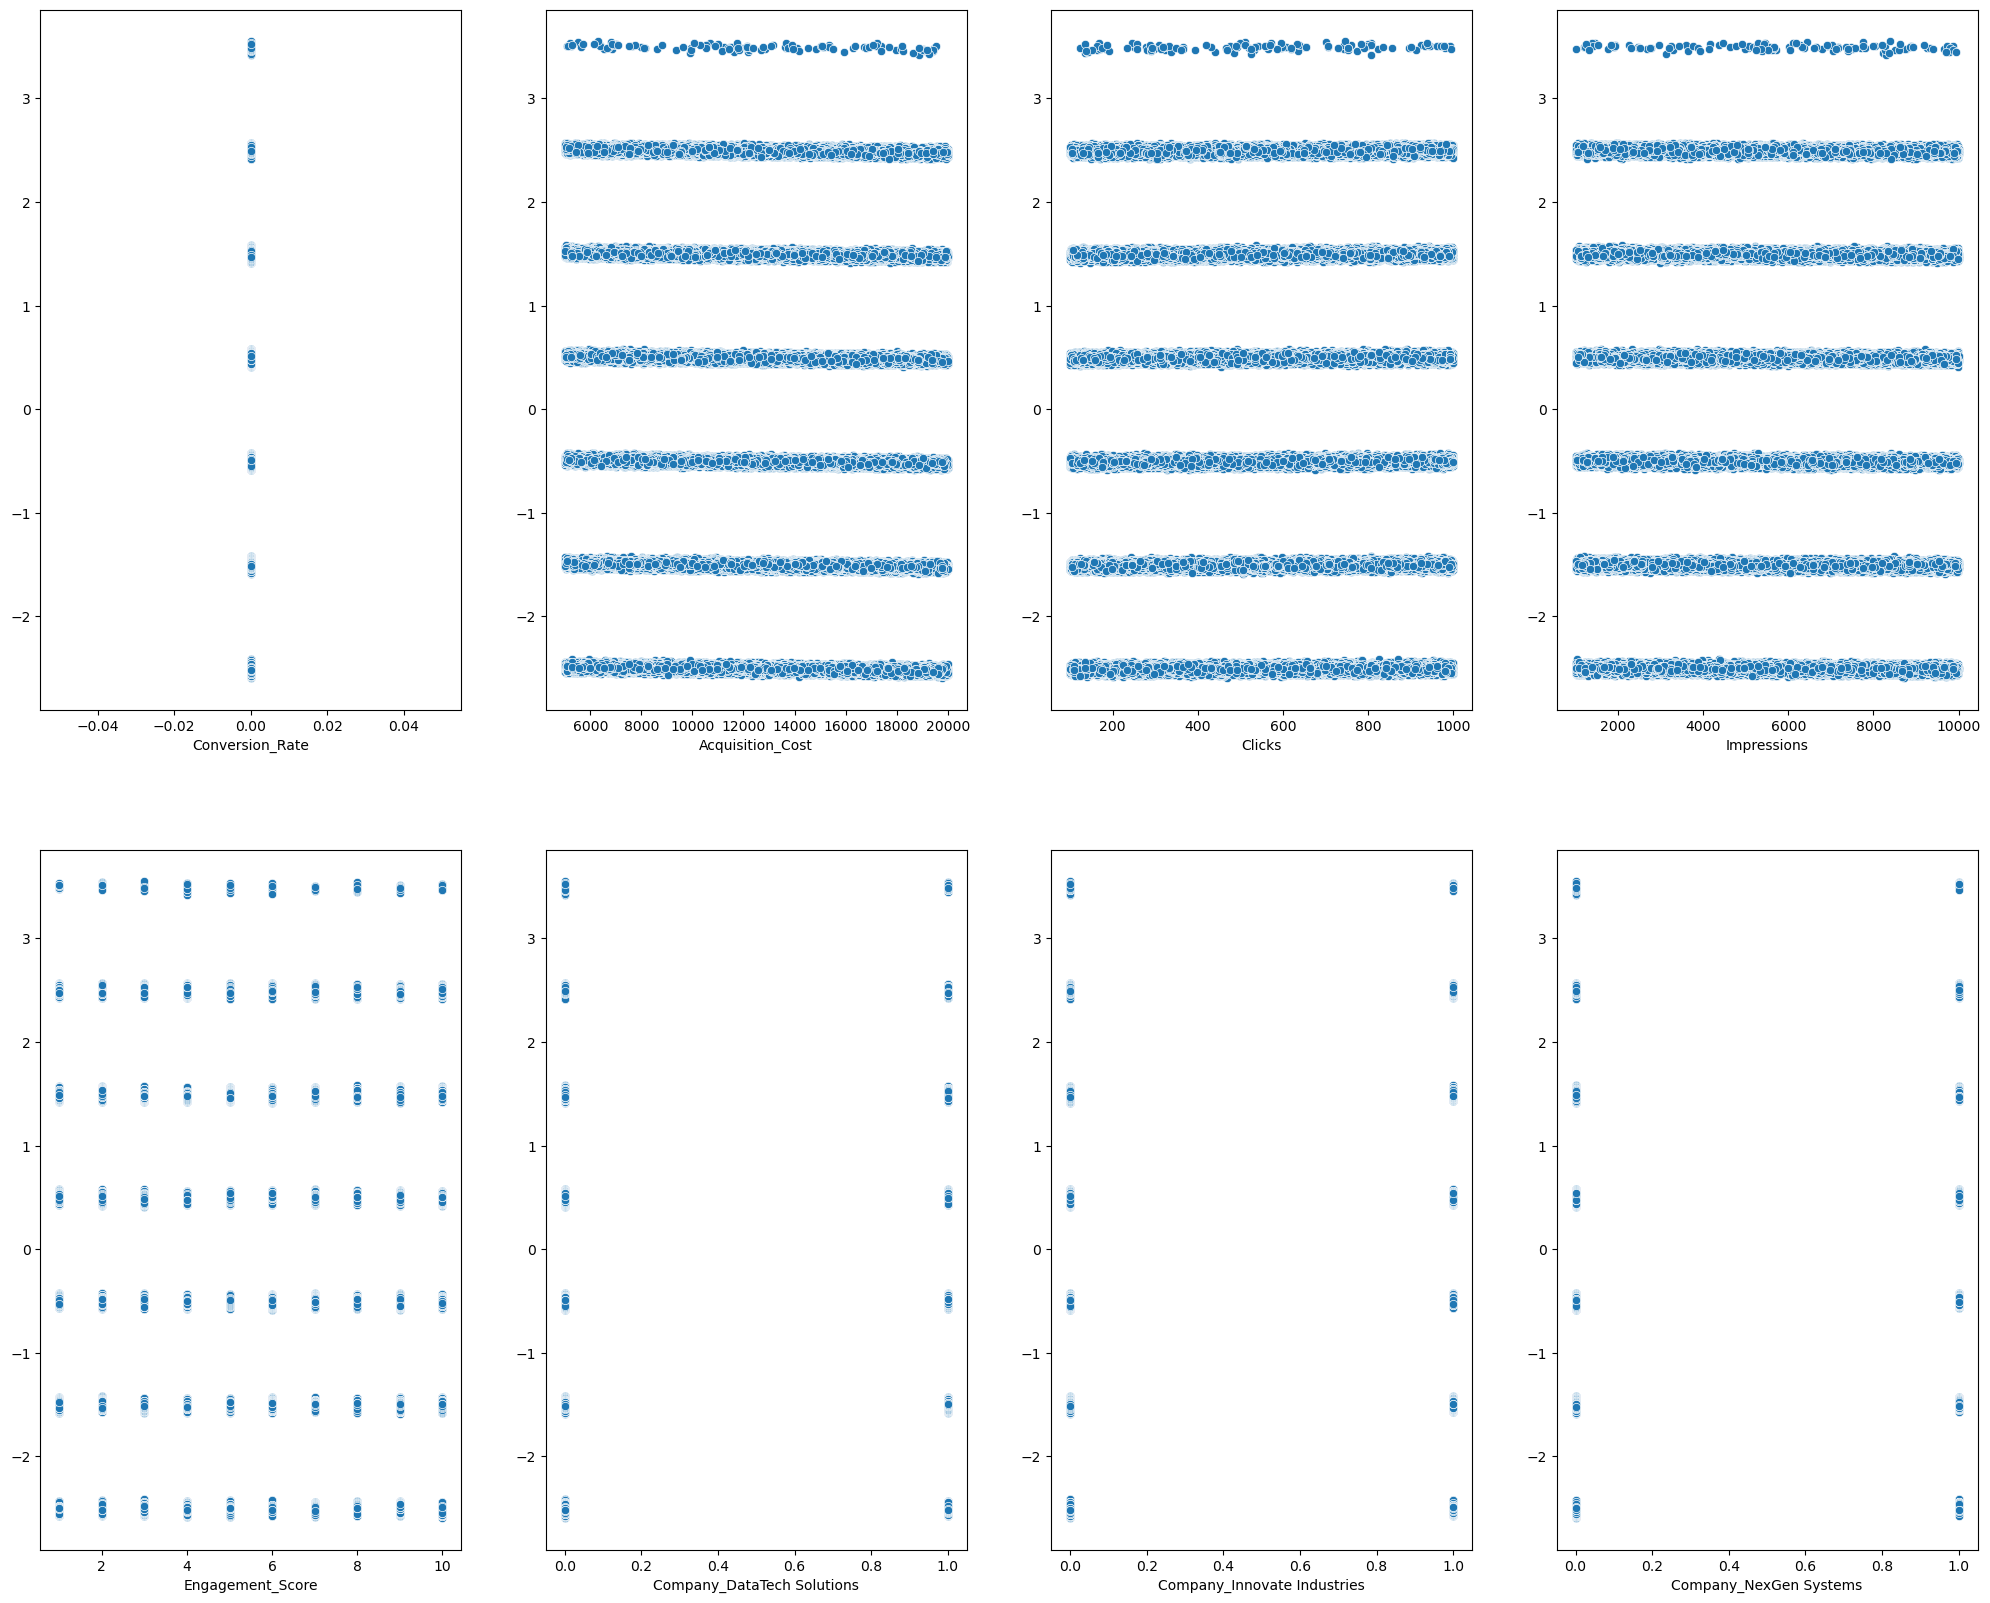

In [506]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:], ax.flatten()):
    sns.scatterplot(x=X_train[variable], y=linreg_full_model_withoutlog.resid, ax=subplot)

# display the plot
plt.show()


In [507]:
#From the plots we see that none of the plots show a specific pattern much. 
#Hence, we may conclude that the variables are linearly related to the dependent variable

In [508]:
#Normality of Residuals

In [509]:
#The assumption of normality is an important assumption for many statistical tests. 
#The normal Q-Q plot is one way to assess normality. The quantile-quantile(Q-Q) is a scatter plot that will help in 
#validating the assumption of normal distribution in a data set.

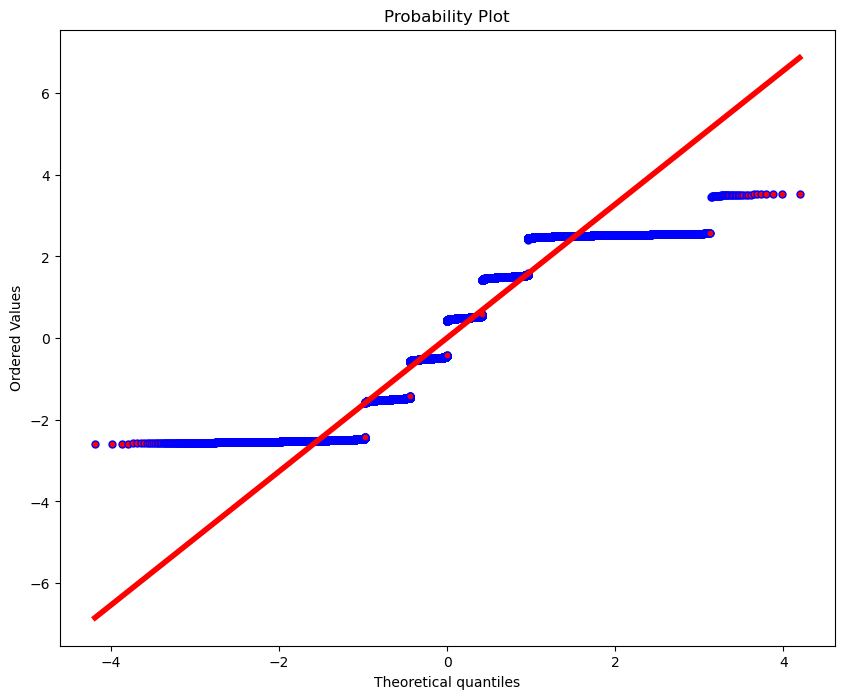

In [510]:
# calculate fitted values
fitted_vals = linreg_full_model_withoutlog.predict(X_test)

# calculate residuals
resids = actual_ROI - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

In [511]:
#Using this plot, we can infer that the residuals do not come from a normal distribution. 
#This is expected as our target variable is not normally distributed.

In [512]:
#The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)

In [513]:
# check the mean of the residual
linreg_full_model_withoutlog.resid.mean()

2.6271038677805336e-14

In [514]:
#The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is 
#present and the model's predictions are reasonably accurate.

In [515]:
#Perform Jarque Bera test to check normality of the residuals

In [516]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(resids)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=3336.887, p-value=0.000
The data is not normally distributed (reject H0)


It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis.
It can be concluded that the residuals is not normally distributed.

Linear Regression with Interaction (OLS)

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables
An interaction effect occurs when the effect of one variable depends on another variable. 
This combined effect may or may not improve the performance of the model
Comparing the coefficient of determination with and without the interaction term:
The model for which interaction term is considered, the coefficient of determination may vary. 
It is crucial to check for the significance of the interaction term.
If the term is found to be significant then the coefficient of determination increases. 
If the term is not significant, there is not much change in the coefficient of determination.

In order to build the model, we do the following:
                    1.Compute the interaction effect
                    2.Split the data into training and test sets
                    3.Build model using sm.OLS().fit()
                    4.Predict the values using test set
                    5.Compute accuracy measures
                    6.Tabulate the results

Compute the interaction effect

In [517]:
# Create a copy of the entire dataset to add the interaction effect using copy()
df_interaction = df_dummy.copy()

# Add the interaction variable
df_interaction['ROI_mul_Channel_Used_Facebook'] = df_interaction['ROI'] * df_interaction['Channel_Used_Facebook']

# Print the data with interaction
df_interaction.head()

const  Conversion_Rate  Acquisition_Cost  ROI  Clicks  Impressions  \
0 1.000000                0             16174    6     506         1922   
1 1.000000                0             11566    5     116         7523   
2 1.000000                0             10200    7     584         7698   
3 1.000000                0             12724    5     217         1820   
4 1.000000                0             16452    6     379         4201   

   Engagement_Score  log_ROI  Company_DataTech Solutions  \
0                 6        1                           0   
1                 7        1                           0   
2                 1        1                           0   
3                 7        1                           1   
4                 3        1                           0   

   Company_Innovate Industries  Company_NexGen Systems  Company_TechCorp  \
0                            1                       0                 0   
1                            0                       1                 0   
2                            0                       0                 0   
3                            0                       0                 0   
4                            0                       1                 0   

   Campaign_Type_Email  Campaign_Type_Influencer  Campaign_Type_Search  \
0                    1                         0                     0   
1                    1                         0                     0   
2                    0                         1                     0   
3                    0                         0                     0   
4                    1                         0                     0   

   Campaign_Type_Social Media  Channel_Used_Facebook  Channel_Used_Google Ads  \
0                           0                      0                        1   
1                           0                      0                        1   
2                           0                      0                        0   
3                           0                      0                        0   
4                           0                      0                        0   

   Channel_Used_Instagram  Channel_Used_Website  Channel_Used_YouTube  \
0                       0                     0                     0   
1                       0                     0                     0   
2                       0                     0                     1   
3                       0                     0                     1   
4                       0                     0                     1   

   Location_Houston  Location_Los Angeles  Location_Miami  Location_New York  \
0                 0                     0               0                  0   
1                 0                     0               0                  1   
2                 0                     1               0                  0   
3                 0                     0               1                  0   
4                 0                     1               0                  0   

   Language_French  Language_German  Language_Mandarin  Language_Spanish  \
0                0                0                  0                 1   
1                0                1                  0                 0   
2                1                0                  0                 0   
3                0                0                  1                 0   
4                0                0                  1                 0   

   Customer_Segment_Foodies  Customer_Segment_Health & Wellness  \
0                         0                                   1   
1                         0                                   0   
2                         0                                   0   
3                         0                                   1   
4                         0                                   1   

   Customer_Segment_Outd

In [518]:
sns.pairplot(df_interaction)

In [519]:
#Split the data into training and test sets
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = df_interaction.drop(['ROI','log_ROI'], axis=1)

# extract the target variable from the train set
y = df_interaction['ROI']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (150000, 32)
The shape of X_test_interaction is: (50000, 32)
The shape of y_train is: (150000,)
The shape of y_test is: (50000,)


In [520]:
#Build model using sm.OLS().fit()
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROI   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     985.9
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        17:23:57   Log-Likelihood:            -2.7994e+05
No. Observations:              150000   AIC:                         5.599e+05
Df Residuals:                  149969   BIC:                         5.602e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


This model explains 84.1% of the variation in dependent variable charges.
The Durbin-Watson test statistics is 2.030 and indicates that the is no autocorrelation. 
The Condition Number is 663 suggests that there is a moderate(low) collinearity.
The collinearity is likely to increase because of the interaction effect.

In [521]:
#Predict the values using test set
# predict the 'charges' using predict()
predicted_ROI = linreg_with_interaction.predict(X_test_interaction)

# extract the 'charges' values from the test data
actual_ROI = y_test

In [522]:
#Compute model accuracy measures
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_ROI, predicted_ROI)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

In [523]:
#Tabulate the results

In [524]:
# Compile the required information for the model with interaction
linreg_with_interaction_metrics = pd.DataFrame({
    'Model_Name': ["linreg_with_interaction"],
    'RMSE': [linreg_with_interaction_rmse],
    'R-Squared': [linreg_with_interaction_rsquared],
    'Adj. R-Squared': [linreg_with_interaction_rsquared_adj]
})

# Concatenate the new metrics to the score card DataFrame
score_card = pd.concat([score_card, linreg_with_interaction_metrics], ignore_index=True)

# Print the result table
print(score_card)


                Model_Name     RMSE  R-Squared  Adj. R-Squared
0       Linreg without log 1.710776   0.000198        0.000005
1  linreg_with_interaction 1.562312   0.164728        0.164561


From the summary output, The first model, "Linreg without log," performs poorly based on these metrics.
It has a high RMSE, indicating poor predictive accuracy, and extremely low R-squared and adjusted R-squared values,suggesting that the model explains almost none of the variance in the dependent variable. 

This indicates that the model lacks explanatory power and does not fit the data well.

Conversely, the second model, "linreg_with_interaction," seems to perform slightly better,
as it has a lower RMSE and higher R-squared values. 

However, without additional context or comparisons to other models, it's challenging to determine the overall 
effectiveness of this model.

Gradient Descent

Gradient descent is an optimization algorithm used to minimize a function.

It works by iteratively updating the parameters of the function in the opposite direction of the gradient of the function with respect to its parameters, with the step size determined by the learning rate. The goal is to find the set of parameters that result in the lowest value of the function, also known as the global minimum. This process is repeated until a satisfactory solution is found or a stopping criterion is met.

Scaling the data
Scaling is important when performing gradient descent because it can significantly affect the convergence rate 
of the algorithm.

In [525]:
df_numeric_features['ROI_mul_Channel_Used_Facebook'] = df_numeric_features['ROI'] * df_dummy['Channel_Used_Facebook']
print(df_numeric_features.head())

   Conversion_Rate  Acquisition_Cost      ROI  Clicks  Impressions  \
0         0.040000      16174.000000 6.290000     506         1922   
1         0.120000      11566.000000 5.610000     116         7523   
2         0.070000      10200.000000 7.180000     584         7698   
3         0.110000      12724.000000 5.550000     217         1820   
4         0.050000      16452.000000 6.500000     379         4201   

   Engagement_Score  log_ROI  ROI_mul_Channel_Used_Facebook  
0                 6 1.838961                       0.000000  
1                 7 1.724551                       0.000000  
2                 1 1.971299                       0.000000  
3                 7 1.713798                       0.000000  
4                 3 1.871802                       0.000000  


In [526]:
# storing the target variable in y 
y = df_numeric_features['ROI']

In [527]:
df_numeric_features = df_numeric_features.drop(['ROI','log_ROI'],axis=1)

In [528]:
X_scaled = pd.concat([df_numeric_features.reset_index(drop=True), df_categoric_features.reset_index(drop=True)], axis = 1)

In [529]:
X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled = train_test_split(X_scaled,y,random_state=1)

In [530]:
X_train_scaled.shape,X_test_scaled.shape

((150000, 31), (50000, 31))

In [531]:
y_train_scaled.shape,y_test_scaled.shape

((150000,), (50000,))

In [532]:
X_train_scaled = pd.DataFrame(scaler_ind.transform(X_train_scaled),columns=X_train_scaled.columns)

scaler_ind.fit(X_test_scaled)

X_test_scaled = pd.DataFrame(scaler_ind.transform(X_test_scaled),columns=X_test_scaled.columns)

NameError: name 'scaler_ind' is not defined

In [ ]:
X_train_scaled.head()

In [ ]:
# scaling the target variable
scaler_target = StandardScaler()
scaler_target.fit(np.array(y_train_scaled).reshape((-1,1)))
y_train_scaled = scaler_target.fit_transform(np.array(y_train_scaled).reshape((-1,1)))


scaler_target.fit(np.array(y_test_scaled).reshape((-1,1)))
y_test_scaled = scaler_target.fit_transform(np.array(y_test_scaled).reshape((-1,1)))

In [ ]:
#Stochastic Gradient Descent - SGD
